In [1]:
!pip install brian2

     |████████████████████████████████| 1.2MB 7.6MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257161 sha256=dea5234a33e8d8b6b4e45a0e3d3e9efed2f66017c03a05d92c07b93cbf62dfee
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


In [2]:
from brian2 import *
import random 
import numpy as np

In [3]:
start_scope()

tau_pre = tau_post = 10*ms
A_pre = 0.15
A_post = -A_pre*tau_pre/tau_post*1.5
t_max = 50*ms
N1 = 10
N2 = 2

presynaptic = NeuronGroup(N1, 'tspike:second', threshold='t>tspike', refractory=100*ms)
postsynaptic = NeuronGroup(N2, 'tspike:second', threshold='t>tspike', refractory=100*ms)
presynaptic.tspike = 'i*t_max/(N1-1)'
postsynaptic.tspike = '(N2-1-i)*t_max/(N2-1)'

S = Synapses(presynaptic, postsynaptic,
             '''
             w : 1
             dapre/dt = -apre/tau_pre : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += A_pre
             w = w+apost
             ''',
             on_post='''
             apost += A_post
             w = w+apre
             ''')
S.connect(i=np.arange(10),j=0)
S.connect(i=np.arange(10),j=1)

arr = []
for x in range (2):
  for y in range (10):
    arr.append(postsynaptic.tspike[x] - presynaptic.tspike[y])

out_spike_mon = SpikeMonitor(postsynaptic)
in_spike_mon = SpikeMonitor(presynaptic)

run(t_max+1*ms)

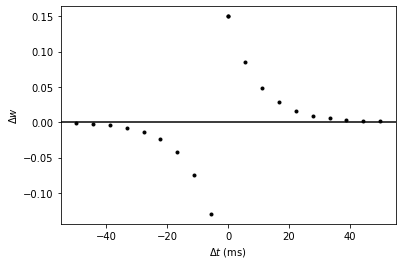

In [4]:
plot(arr/ms, S.w, '.k')
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')
show()

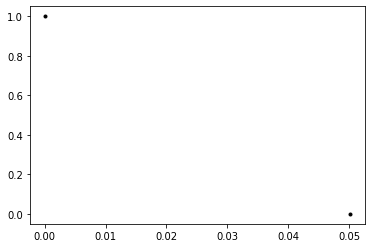

In [5]:
#output-spikes
plot(out_spike_mon.t, out_spike_mon.i, '.k')

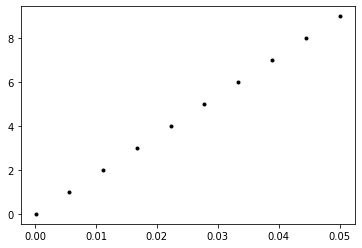

In [6]:
#Input_spikes
plot(in_spike_mon.t, in_spike_mon.i, '.k' )

In [7]:
tau_pre = tau_post = 10*ms
A_pre = 0.15
A_post = -A_pre*tau_pre/tau_post*1.5

eqs = '''
dv/dt = (I*1.5-v)/tau : 1
I : 1
tau : second
'''

In [14]:
start_scope()
input_layer = NeuronGroup(10, eqs, threshold='v>=1', reset='v=0', method='exact')
input_layer.I = [1, 2, 1, 1, 2, 0, 0, 0, 0, 0]
input_layer.tau = [1*ms]*10

output_layer    = NeuronGroup(2,  eqs, threshold='v>=1', reset='v=0', method='euler')

S = Synapses(input_layer, output_layer,
             '''
             w : 1
             dapre/dt = -apre/tau_pre : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += A_pre
             w = w+apost
             ''',
             on_post='''
             apost += A_post
             w = w+apre
             ''')
S.connect(p=1)
S.w = [rand() for i in range(20)]

out_mon = StateMonitor(output_layer, 'v' , record=True)
out_spike_mon = SpikeMonitor(output_layer)
in_spike_mon = SpikeMonitor(input_layer)

run(10*second)

WARNING    "tau_post" is an internal variable of group "synapses_3", but also exists in the run namespace with the value 10. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "tau_pre" is an internal variable of group "synapses_3", but also exists in the run namespace with the value 10. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


BrianObjectException: ignored

Text(0.5, 1.0, 'input-spikes')

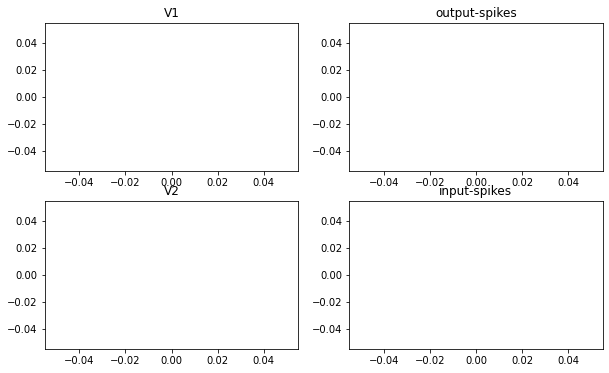

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
axs[0, 0].plot(out_mon.t, out_mon.v[0].T)
axs[0, 0].set_title("V1")
axs[1, 0].plot(out_mon.t, out_mon.v[1].T)
axs[1, 0].set_title("V2")

axs[0, 1].plot(out_spike_mon.t, out_spike_mon.i, '.k')
axs[0, 1].set_title("output-spikes")
axs[1, 1].plot(in_spike_mon.t, in_spike_mon.i, '.k')
axs[1, 1].set_title("input-spikes")